In [1]:
import os
import librosa
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Paths to the folders containing the crying and laughing files (use raw string to avoid backslash issues)
crying_path = r'c:\Users\dell\Data Science\TensorFlow Project\Crying'
laughing_path = r'c:\Users\dell\Data Science\TensorFlow Project\laughing'

def rename_files_sequentially_and_count(folder_path, prefix):
    """Renames all .wav files in the folder sequentially with a given prefix and counts the number of files."""
    # List only files ending with .wav
    files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
    files.sort()  # Optional: Sort files to maintain order
    
    count = len(files)  # Count the number of .wav files
    print(f"Number of '{prefix}' files in '{folder_path}': {count}")
    
    for i, file in enumerate(files, start=1):
        old_name = os.path.join(folder_path, file)
        new_name = os.path.join(folder_path, f"{prefix}_{i:04d}.wav")
        
        # Rename the file
        os.rename(old_name, new_name)
        print(f"Renamed: {old_name} -> {new_name}")
    
    return count

# Call the function to rename files and count the number of files in the specified folders
crying_count = rename_files_sequentially_and_count(crying_path, "crying")
laughing_count = rename_files_sequentially_and_count(laughing_path, "laughing")

# Display the total counts
print(f"Total number of crying files: {crying_count}")
print(f"Total number of laughing files: {laughing_count}")


Number of 'crying' files in 'C:\DATA MP4\FinalData': 2166
Renamed: C:\DATA MP4\FinalData\crying_0001.wav -> C:\DATA MP4\FinalData\crying_0001.wav
Renamed: C:\DATA MP4\FinalData\crying_0002.wav -> C:\DATA MP4\FinalData\crying_0002.wav
Renamed: C:\DATA MP4\FinalData\crying_0003.wav -> C:\DATA MP4\FinalData\crying_0003.wav
Renamed: C:\DATA MP4\FinalData\crying_0004.wav -> C:\DATA MP4\FinalData\crying_0004.wav
Renamed: C:\DATA MP4\FinalData\crying_0005.wav -> C:\DATA MP4\FinalData\crying_0005.wav
Renamed: C:\DATA MP4\FinalData\crying_0006.wav -> C:\DATA MP4\FinalData\crying_0006.wav
Renamed: C:\DATA MP4\FinalData\crying_0007.wav -> C:\DATA MP4\FinalData\crying_0007.wav
Renamed: C:\DATA MP4\FinalData\crying_0008.wav -> C:\DATA MP4\FinalData\crying_0008.wav
Renamed: C:\DATA MP4\FinalData\crying_0009.wav -> C:\DATA MP4\FinalData\crying_0009.wav
Renamed: C:\DATA MP4\FinalData\crying_0010.wav -> C:\DATA MP4\FinalData\crying_0010.wav
Renamed: C:\DATA MP4\FinalData\crying_0011.wav -> C:\DATA MP4\

Audio Data Shape: (4795, 13)
Labels Shape: (4795,)


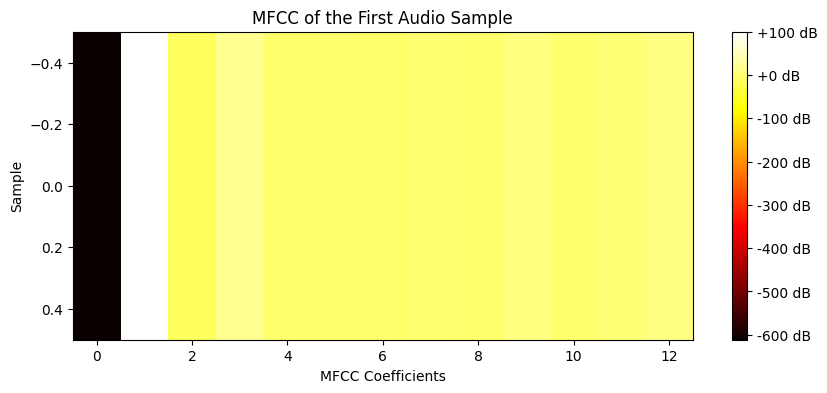

Training Data Shape: (3068, 13)
Validation Data Shape: (768, 13)
Test Data Shape: (959, 13)


In [3]:
audio_data = []
labels = []

# Function to extract MFCCs from an audio file
def extract_features(file_path):
    # Load audio file with librosa
    y, sr = librosa.load(file_path, sr=None)  # sr=None to keep the original sampling rate
    # Extract MFCCs (Mel-Frequency Cepstral Coefficients)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # 13 MFCC coefficients
    # Take the mean of each coefficient (feature aggregation)
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

# Process the crying audio files
for file in os.listdir(crying_path):
    if file.endswith('.wav'):
        file_path = os.path.join(crying_path, file)
        # Extract features
        features = extract_features(file_path)
        audio_data.append(features)
        labels.append(0)  # Label for crying

# Process the laughing audio files
for file in os.listdir(laughing_path):
    if file.endswith('.wav'):
        file_path = os.path.join(laughing_path, file)
        # Extract features
        features = extract_features(file_path)
        audio_data.append(features)
        labels.append(1)  # Label for laughing

# Convert to numpy arrays for model input
audio_data = np.array(audio_data)
labels = np.array(labels)

# Display the shape of the data
print(f"Audio Data Shape: {audio_data.shape}")
print(f"Labels Shape: {labels.shape}")

# Visualize the first MFCC feature from a sample
plt.figure(figsize=(10, 4))
plt.imshow(audio_data[0].reshape(1, -1), aspect='auto', cmap='hot')
plt.colorbar(format="%+2.0f dB")
plt.title('MFCC of the First Audio Sample')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Sample')
plt.show()

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(audio_data, labels, test_size=0.2, random_state=42)

# Further split the training data for validation (80% for training, 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_val.shape}")
print(f"Test Data Shape: {X_test.shape}")

In [4]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already processed your features and labels
# X_train: feature data
# y_train: labels (crying = 0, laughing = 1)
# X_test, y_test: test data and labels

# Initialize your model and scaler
model = LogisticRegression()
scaler = StandardScaler()

# Fit the scaler on your training data
X_train_scaled = scaler.fit_transform(X_train)

# Fit the model
model.fit(X_train_scaled, y_train)

# Save both the model and the scaler
joblib.dump(model, 'model.joblib')
if scaler is not None:
    joblib.dump(scaler, 'scaler.joblib')
    print("✅ Scaler saved successfully!")
else:
    print("❌ Scaler is None and cannot be saved")

print("✅ Model and Scaler saved successfully!")

# Scale the test data using the same scaler (Important! Use the trained scaler)
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Scaler saved successfully!
✅ Model and Scaler saved successfully!
Accuracy on Test Set: 0.9165797705943691

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       432
           1       0.94      0.91      0.92       527

    accuracy                           0.92       959
   macro avg       0.92      0.92      0.92       959
weighted avg       0.92      0.92      0.92       959



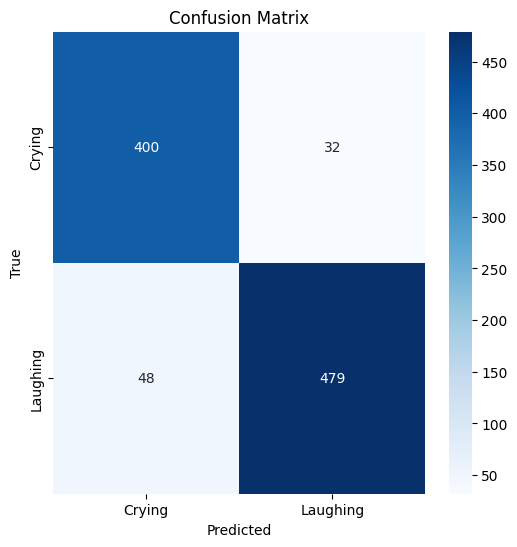

In [5]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Crying', 'Laughing'], yticklabels=['Crying', 'Laughing'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [6]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy on Test Set:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy on Test Set: 0.9833159541188738

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       432
           1       0.97      1.00      0.98       527

    accuracy                           0.98       959
   macro avg       0.98      0.98      0.98       959
weighted avg       0.98      0.98      0.98       959



In [7]:
# 1️⃣ Path to save the model
directory_path = r'C:\Users\dell\Data Science\TensorFlow Project'
model_path = os.path.join(directory_path, 'model.joblib')

# 2️⃣ Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)  # exist_ok=True avoids errors if the folder already exists

# 4️⃣ Save the model to the specified path
joblib.dump(model, model_path)
print(f"✅ Model saved successfully at {model_path}")


✅ Model saved successfully at C:\Users\dell\Data Science\TensorFlow Project\model.joblib
